In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Problem 1

### Hypothesis Testing using Simulation (10 pts)
The dataset iris contains measurements on three species of iris flowers. In this assignment, you’ll focus only on the 50 observations with Species == "versicolor". Complete both of the following tasks and report results and interpretations.
A botanist claims that the average sepal length of her Iris versicolor plants is 5.5 cm. You will test this claim via simulation.

In [22]:
iris = load_iris(as_frame=True)
df = iris.frame
df=df[df['target'] == 1] # only versicolor
observed_mean = df['sepal length (cm)'].mean()
print(observed_mean)

5.936


In [83]:
observed_mean = df['sepal length (cm)'].mean()
num_simulations = 1_000_000_000
n = len(df)
sample_std = df['sepal length (cm)'].std(ddof=1)
print(sample_std)

CLAIMED_MEAN = 5.5

simulated_means = np.random.normal(loc=CLAIMED_MEAN, scale=sample_std/np.sqrt(n), size=num_simulations)


0.5161711470638635


In [84]:
observed_diff = np.abs(observed_mean - CLAIMED_MEAN)

extreme_count = np.sum(np.abs(simulated_means - CLAIMED_MEAN) >= observed_diff)

p_value = extreme_count / num_simulations
print(f"p-value: {p_value}")

p-value: 2e-09


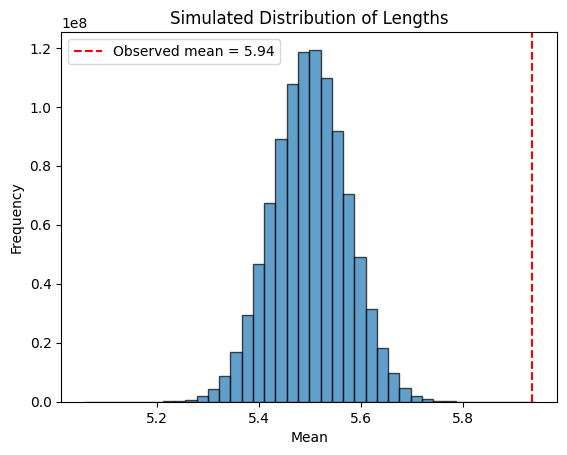

In [85]:
plt.hist(simulated_means, bins=40, alpha=0.7, edgecolor='black')
plt.axvline(observed_mean, color='red', linestyle='--', label=f'Observed mean = {observed_mean:.2f}')
plt.title("Simulated Distribution of Lengths")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Intepretation and Results

The actual observed mean of the data was 5.94 cm with a standard deviation of 0.516 cm.

In order to test the assumption that the true mean was 5.5, I ran 10,000,000 simulations. This resulted in a p-value of about 2e-9 Since this is dramatically less than 0.05, we **reject the null hypothesis** that the true mean is 5.5.

# Problem 2

### Simple linear regression: investigate if wind speed largely explains ozone variation

a. Multicollinearity check using pairwise correlation plot.


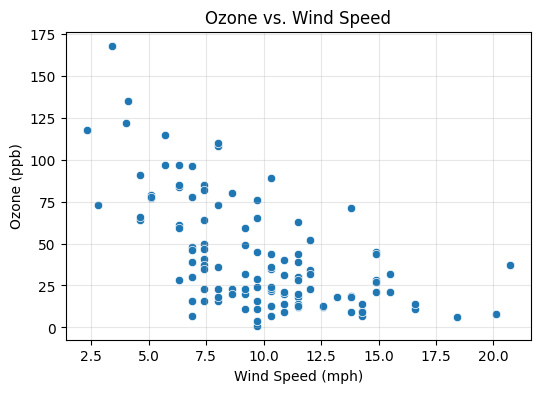

Correlation (Ozone vs. Wind): -0.602


In [89]:
df = pd.read_csv('airquality.csv')
df.columns
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Wind', y='Ozone', data=df)
plt.title('Ozone vs. Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Ozone (ppb)')
plt.grid(True, alpha=0.3)
plt.show()

correlation_slr = df['Wind'].corr(df['Ozone'])
print(f"Correlation (Ozone vs. Wind): {correlation_slr:.3f}")

b. Fit a model, write down the fitted model and interpret: the coefficient estimates, model performance.

In [91]:
print("\nb. Fit Model & Interpretation (SLR)")
slr_model = smf.ols('Ozone ~ Wind', data=df).fit()
print(slr_model.summary())

# Fitted model equation
intercept_slr = slr_model.params['Intercept']
slope_wind_slr = slr_model.params['Wind']
print(f"\nFitted Model: Ozone_pred = {intercept_slr:.3f} + ({slope_wind_slr:.3f}) * Wind")



b. Fit Model & Interpretation (SLR)
                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     64.64
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           9.27e-13
Time:                        21:08:05   Log-Likelihood:                -543.59
No. Observations:                 116   AIC:                             1091.
Df Residuals:                     114   BIC:                             1097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     9

c. Predict the ozone concentration when wind = 10 mph.

In [92]:
wind_value = 10
predicted_ozone_slr = slr_model.predict(pd.DataFrame({'Wind': [wind_value]}))
print(f"Predicted Ozone at Wind = {wind_value} mph: {predicted_ozone_slr.iloc[0]:.3f} ppb")


Predicted Ozone at Wind = 10 mph: 41.364 ppb


d. Check model assumptions using diagnostic plots.

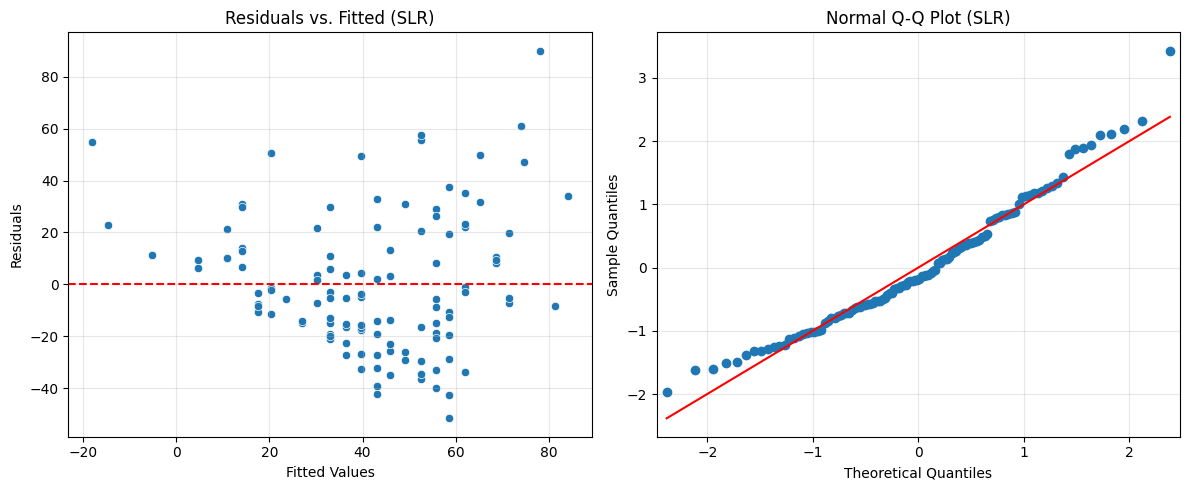

In [ ]:
residuals_slr = slr_model.resid
fitted_slr = slr_model.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=fitted_slr, y=residuals_slr, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs. Fitted (SLR)')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].grid(True, alpha=0.3)

sm.qqplot(residuals_slr, line='s', ax=axes[1], fit=True)
axes[1].set_title('Normal Q-Q Plot (SLR)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Multiple Linear regression: include wind speed, temperature and solar radiation to improve predictions
a. Multicollinearity check using pairwise correlation plot.

b. Fit a model, write down the fitted model and interpret: the coefficient estimates, model performance.

c. Check model assumptions using diagnostic plots.